# Basic geometric predicates, conducting tests, visualizing and processing results

In [1]:
import numpy as np
from random import uniform
from visualizer.main import Visualizer

In [2]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

### Introduction
The aim of the exercise is to determine on which side of the straight line the point is located.

# Generating random points on a plane

In [5]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    The function generates n points uniformly in a square area from left to right (equally on the y axis) with real coordinates
    :param left: left end of the interval
    :param right: right end of the interval
    :param n: number of points generated
    :return: an array of points in the form of coordinate tuples np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    generated_points=[-1 for _ in range(n)]
    for i in range(n):
        new_x=uniform(left,right)
        new_y=uniform(left,right)
        generated_points[i]=(new_x,new_y) #uniform function, generates random numbers in the range -1000 to 1000
    return generated_points


In [6]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

# Visualization of points from the "points_a" set

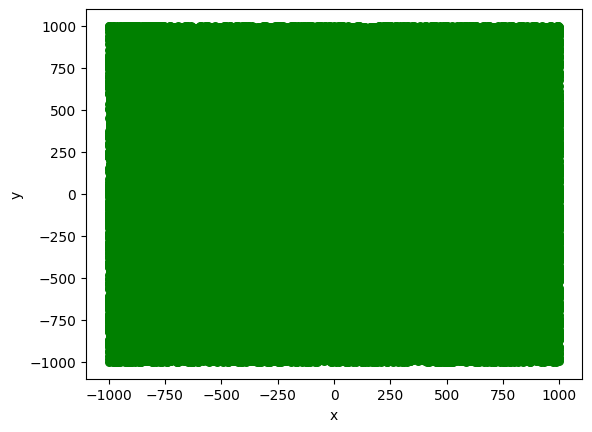

In [7]:
draw_points(points_a)

In [8]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

# Visualization of points from the "points_b" set

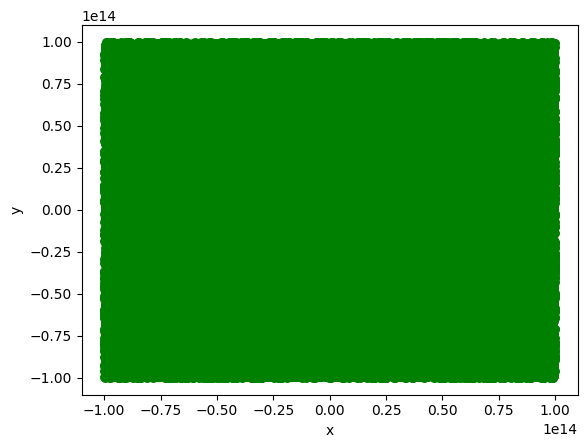

In [9]:
draw_points(points_b)

# Generating random points on a circle

In [10]:
def generate_circle_points(O, R, n = 100):
    """
    The function generates n points uniformly on a circle with center O and radius R
    :param O: a tuple of x, y coordinates specifying the center of the circle
    :param R: circle radius
    :param n: number of points generated
    :return: an array of points in the form of coordinate tuples
    """
    generated_points=[0 for _ in range(n)]
    x_middle=O[0]
    y_middle=O[1]
    for i in range(n):
        engel=uniform(0,360)
        x=R*np.cos(engel)+x_middle
        y=R*np.sin(engel)+y_middle
        generated_points[i]=(x,y)
    return generated_points

In [11]:
points_c = generate_circle_points((0, 0), 100)

# Visualization of points from the "points_c" set

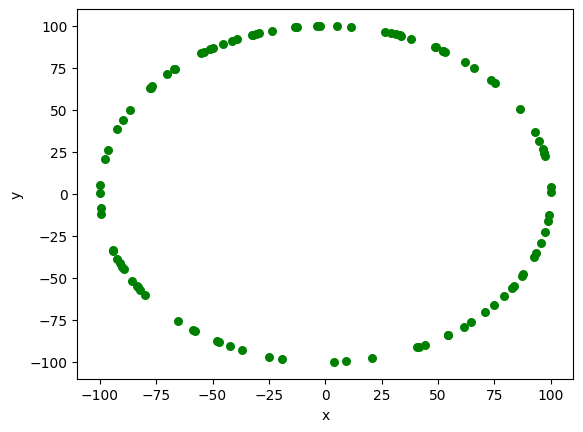

In [12]:
draw_points(points_c)

# Generating random points on a function which was calculated by the given two points

In [13]:
def generate_collinear_points(a, b, n=100):
    """
   The function generates n uniformly collinear points lying on the segment ab between points a and b
    :param a: a tuple of coordinates marking the beginning of the segment
    :param b: a tuple of coordinates marking the end of the segment
    :param n: number of points generated
    :return: an array of points in the form of coordinate tuples
    y=A*x+B
    """
    x_a,y_a=a
    x_b,y_b=b
    A=(y_b-y_a)/(x_b-x_a)
    B=y_a-A*x_a
    generted_points=[-1 for _ in range(n)]
    for i in range(n):
        x_genereted=uniform(-1000,1000)
        y_static=A*x_genereted+B
        generted_points[i]=(x_genereted,y_static)
    return generted_points

In [14]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

# Visualization of points from the "points_d" set

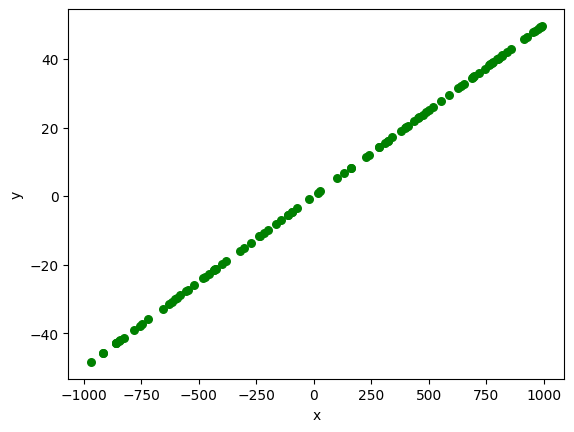

In [15]:
draw_points(points_d)

# Calculating determinants

In [16]:
def mat_det_3x3(a, b, c):
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    return (a_x*b_y*1)+(a_y*1*c_x)+(1*b_x*c_y)-(1*b_y*c_x)-(a_y*b_x*1)-(a_x*1*c_y)

In [17]:
def mat_det_3x3_lib(a, b, c):
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    matrix=np.array([[a_x,a_y,1],[b_x,b_y,1],[c_x,c_y,1]])
    return np.linalg.det(matrix)

In [18]:
def mat_det_2x2(a, b, c):
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    return (a_x-c_x)*(b_y-c_y)-(a_y-c_y)*(b_x-c_x)

In [19]:
def mat_det_2x2_lib(a, b, c):
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    matrix=np.array([[(a_x-c_x),(a_y-c_y)],[(b_x-c_x),(b_y-c_y)]])
    return np.linalg.det(matrix)

# Definition of a function specifying the position of a point

In [20]:
def categorize_points(points, a, b, mat_det_func, eps):
    n=len(points)
    classified_points_left=[]
    classified_points_mid=[]
    classified_points_right=[]
    for i in range(n):
        c_x=points[i][0]
        c_y=points[i][1]
        c=(c_x,c_y)
        det_calculated=mat_det_func(a,b,c)
        if det_calculated>=-eps and det_calculated<=eps: #then the points counted are counted as if they were zero
            classified_points_mid.append(c)
        else:
            if det_calculated>0: classified_points_left.append(c)
            else: classified_points_right.append(c)
    return classified_points_left,classified_points_mid,classified_points_right

# Examples of points a and b through which the function will be calculated

In [21]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

# Classification of points from the set a and their visualization

In [22]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

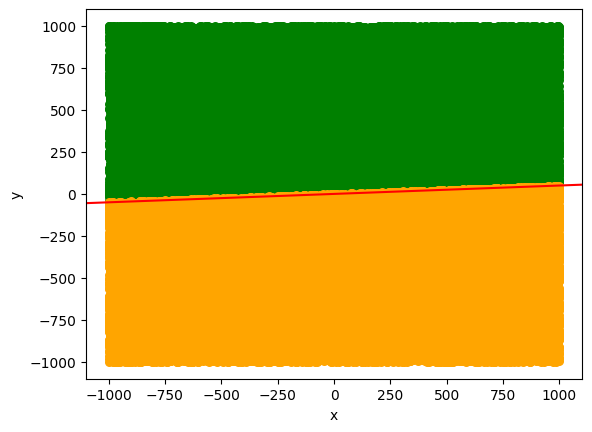

In [23]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

# Classification of points from the set b and their visualization

In [24]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

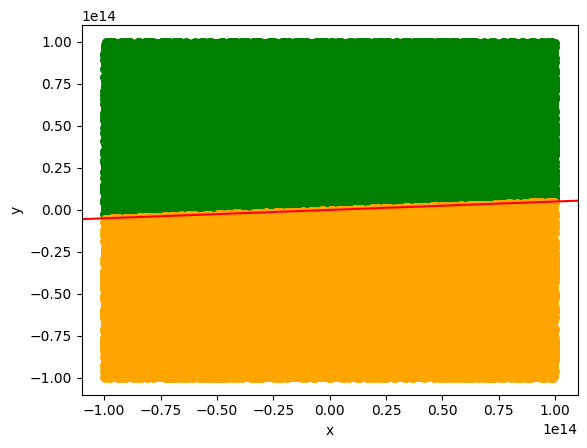

In [25]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

 # Classification of points from the set c and their visualization

In [26]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

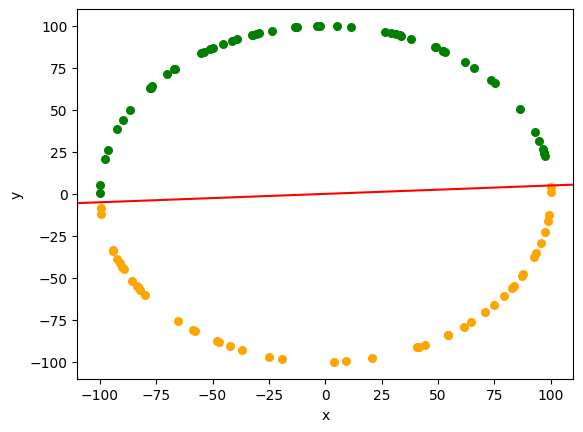

In [27]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

 # Classification of points from the set d and their visualization

In [28]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

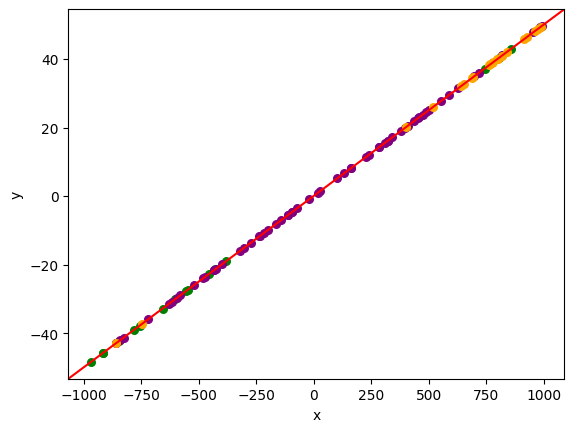

In [29]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

# Defining a new set of points and classification them and visualization

In [30]:
points_a_float32 = np.float32(points_a)

In [31]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -12)

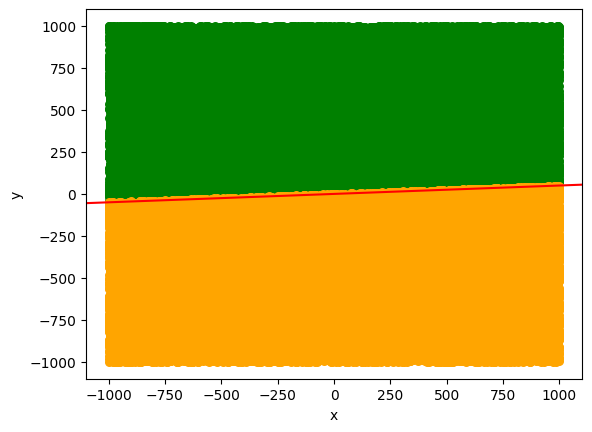

In [32]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)